In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# load data
dados = "/content/dados_fisica_experimental_5_atualizado - dados_fisica_experimental_5_atualizado.csv"
df = pd.read_csv(dados)

df.head()

,ID,Ano de Entrada,Gênero,Escola de Origem,Faltas,Franck-Hertz,Efeito Fotoelétrico,Espectrometria,Raios-X,Média Geral
0,1,2023,Masculino,Pública,1,5.95,7.25,5.38,9.62,7.05
1,2,2020,Feminino,Particular,1,7.86,6.16,7.08,9.61,7.68
2,3,2021,Masculino,Pública,0,9.35,6.90,5.19,6.27,6.93
3,4,2023,Masculino,Particular,1,7.19,7.78,8.19,5.61,7.19
4,5,2023,Masculino,Pública,2,5.75,7.07,8.88,6.79,7.12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   200 non-null    int64  
 1   Ano de Entrada       200 non-null    int64  
 2   Gênero               200 non-null    object 
 3   Escola de Origem     200 non-null    object 
 4   Faltas               200 non-null    int64  
 5   Franck-Hertz         200 non-null    float64
 6   Efeito Fotoelétrico  200 non-null    float64
 7   Espectrometria       200 non-null    float64
 8   Raios-X              200 non-null    float64
 9   Média Geral          200 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 15.8+ KB


In [11]:
df.describe()

,ID,Ano de Entrada,Faltas,Franck-Hertz,Efeito Fotoelétrico,Espectrometria,Raios-X,Média Geral
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2022.05000,1.970000,6.968650,6.824200,6.991950,6.865450,6.912550
std,57.879185,1.08785,1.314435,1.584331,1.488566,1.550279,1.509706,0.856702
min,1.000000,2020.00000,0.000000,2.740000,2.830000,2.490000,2.410000,4.180000
25%,50.750000,2021.00000,1.000000,6.007500,5.667500,5.765000,5.952500,6.357500
50%,100.500000,2022.00000,2.000000,6.970000,6.955000,6.970000,6.860000,6.925000
75%,150.250000,2023.00000,3.000000,8.057500,7.722500,8.255000,7.835000,7.550000
max,200.000000,2023.00000,6.000000,10.000000,10.000000,10.000000,10.000000,9.050000


In [12]:
df['Franck-Hertz'].describe()

,Franck-Hertz
count,200.000000
mean,6.968650
std,1.584331
min,2.740000
25%,6.007500
50%,6.970000
75%,8.057500
max,10.000000


In [13]:
df['Franck-Hertz'].mean()

np.float64(6.96865)

In [14]:
df['Franck-Hertz'].median()

6.97

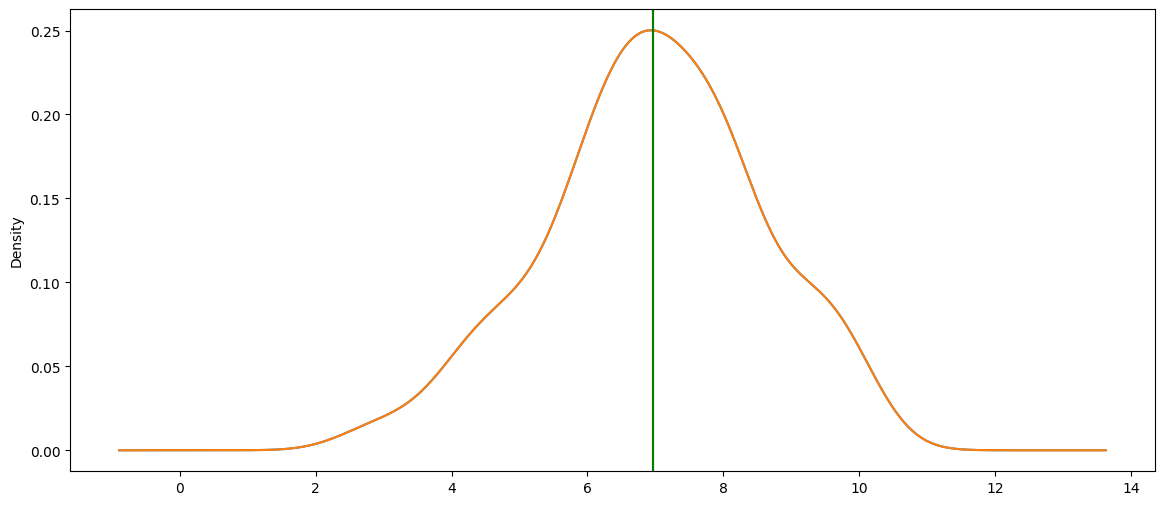

In [22]:
df['Franck-Hertz'].plot(kind='density', figsize=(14,6))
ax = df['Franck-Hertz'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['Franck-Hertz'].mean(), color='red')
ax.axvline(df['Franck-Hertz'].median(), color='green')

Text(0.5, 0, 'Notas')

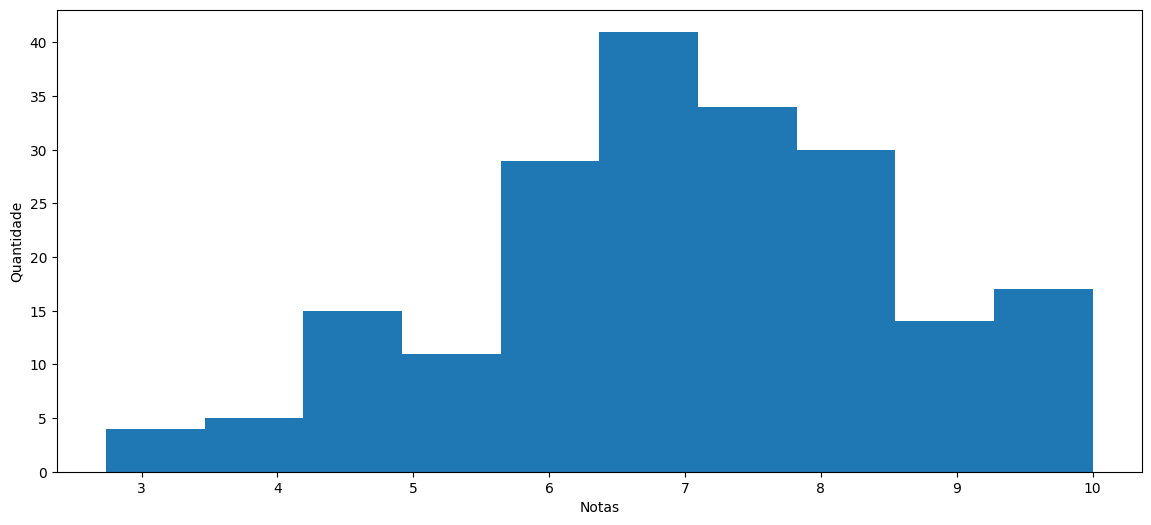

In [23]:
ax = df['Franck-Hertz'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Quantidade')
ax.set_xlabel('Notas')

<Axes: ylabel='count'>

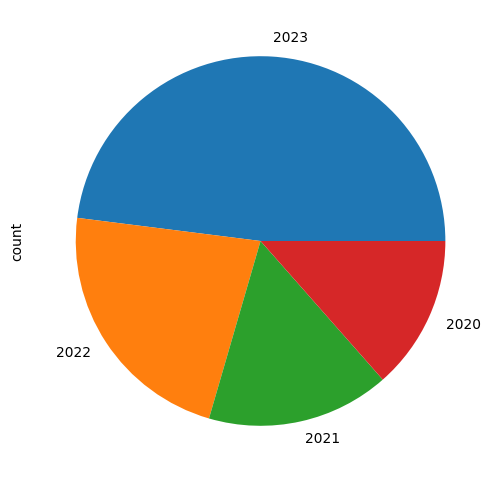

In [33]:
#df['Gênero'].value_counts().plot(kind='pie', figsize=(6,6))
df['Ano de Entrada'].value_counts().plot(kind='pie', figsize=(6,6))
#df['Escola de Origem'].value_counts().plot(kind='pie', figsize=(6,6))

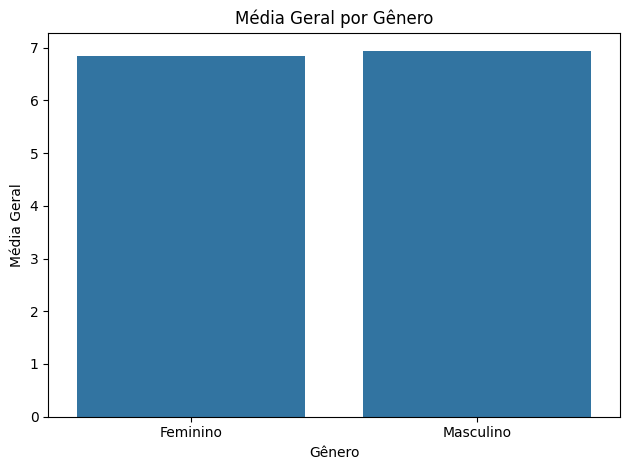

In [41]:
# Agrupar por gênero e calcular a média da média geral
media_por_genero = df.groupby("Gênero")["Média Geral"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure()
sns.barplot(data=media_por_genero, x="Gênero", y="Média Geral")
plt.title("Média Geral por Gênero")
plt.ylabel("Média Geral")
plt.xlabel("Gênero")
plt.tight_layout()


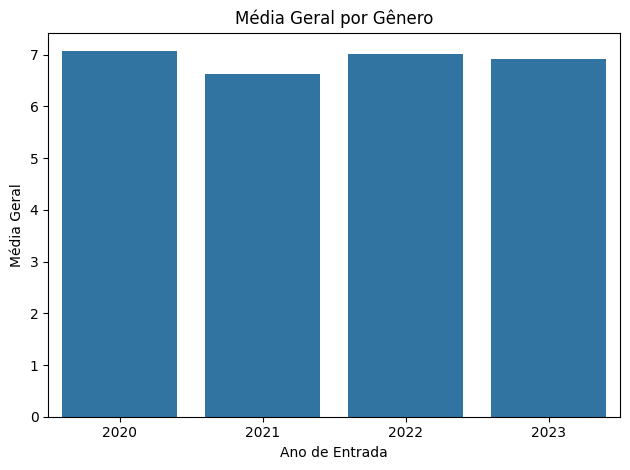

In [43]:
# Agrupar por gênero e calcular a média da média geral
media_por_ano = df.groupby("Ano de Entrada")["Média Geral"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure()
sns.barplot(data=media_por_ano, x="Ano de Entrada", y="Média Geral")
plt.title("Média Geral por ano de entrada")
plt.ylabel("Média Geral")
plt.xlabel("Ano de Entrada")
plt.tight_layout()


,Ano de Entrada
Raios-X,-0.014333
Espectrometria,-0.004200
Efeito Fotoelétrico,0.014889
Franck-Hertz,0.024443


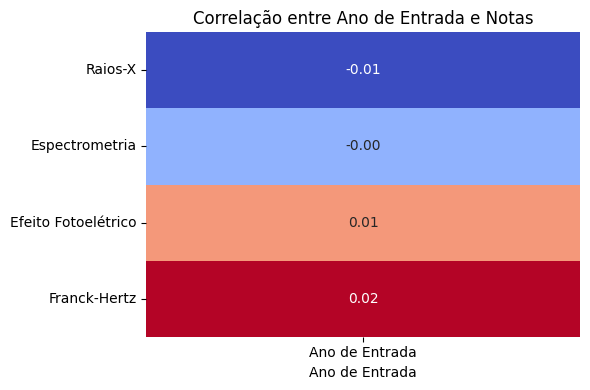

In [57]:
# Garantir que "Ano de Entrada" é numérico
df["Ano de Entrada"] = pd.to_numeric(df["Ano de Entrada"], errors='coerce')

# Selecionar colunas relevantes
experimentos = ['Franck-Hertz', 'Efeito Fotoelétrico', 'Espectrometria', 'Raios-X']
corr_df = df[['Ano de Entrada'] + experimentos].dropna()

# Calcular a correlação de Pearson
correlacoes = corr_df.corr().loc[experimentos, 'Ano de Entrada'].sort_values()

# Plotar heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlacoes.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlação entre Ano de Entrada e Notas")
plt.xlabel("Ano de Entrada")
plt.tight_layout()

correlacoes


<Axes: xlabel='Gênero', ylabel='Média Geral'>

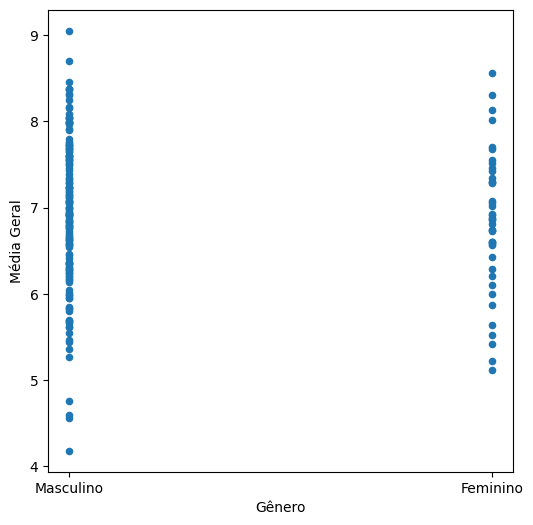

In [56]:
df.plot(kind='scatter', x='Gênero', y='Média Geral', figsize=(6,6))

np.float64(-0.34831891685445493)

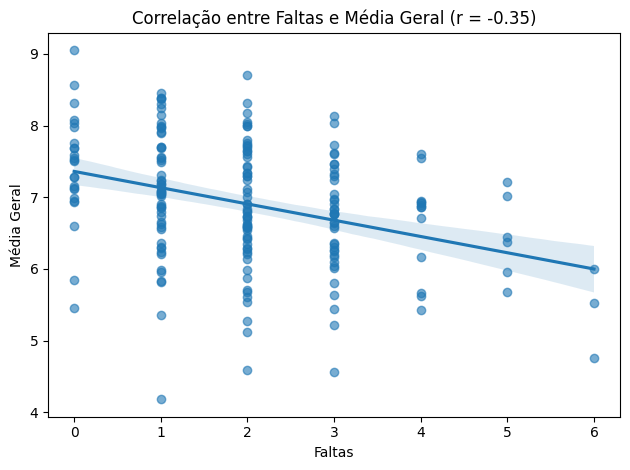

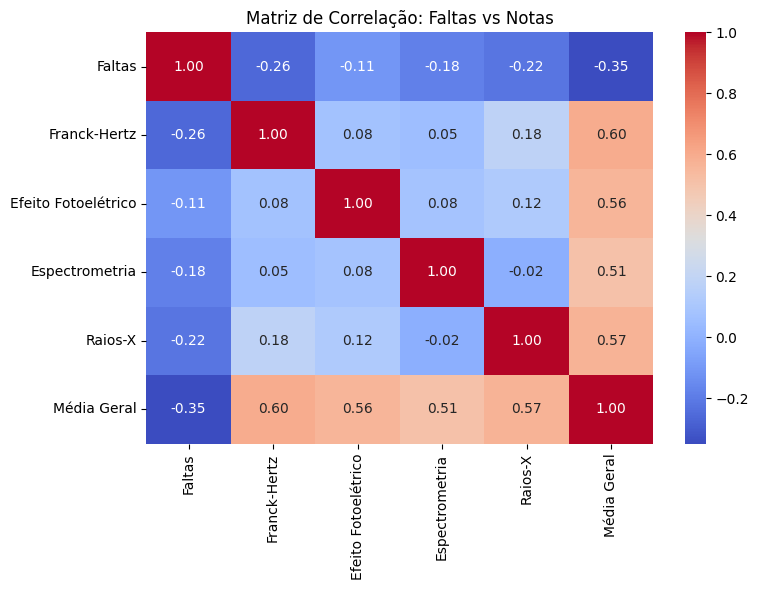

In [59]:
# Calcular correlação entre Faltas e Média Geral
correlacao_faltas_media = df[['Faltas', 'Média Geral']].corr().iloc[0, 1]

# Plotar gráfico de dispersão com linha de regressão
plt.figure()
sns.regplot(data=df, x='Faltas', y='Média Geral', scatter_kws={'alpha':0.6})
plt.title(f'Correlação entre Faltas e Média Geral (r = {correlacao_faltas_media:.2f})')
plt.xlabel('Faltas')
plt.ylabel('Média Geral')
plt.tight_layout()

# Matriz de correlação apenas entre Faltas e todas as outras variáveis numéricas
corr_matrix = df[['Faltas', 'Franck-Hertz', 'Efeito Fotoelétrico', 'Espectrometria', 'Raios-X', 'Média Geral']].corr()

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação: Faltas vs Notas")
plt.tight_layout()


correlacao_faltas_media


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# load data
dados = "/content/dados reais.csv"
reais = pd.read_csv(dados)

reais.head()

,Nome,Freq 1 FE,Freq 2 FE,Freq 3 FE,Sintese FE,NR FE,Freq 1 RX,Freq 2 RX,Freq 3 RX,Sintese RX,...,Freq 3 ES,Sintese ES,NR ES,Freq 1 FH,Freq 2 FH,Freq 3 FH,Sintese FH,NR FH,Freq.(%),Nota
0,Giovanni Chakmakian Nigro,1,1,1,0,8.1,1,1,1,1,...,1,1,9.3,1,1,1,0,5.5,100,8.4
1,Thaciana de Sousa Santos,1,1,1,0,8.1,1,1,1,1,...,1,1,9.3,1,1,1,0,5.5,100,8.4
2,Leonardo Medeiros de Araújo,1,1,1,0,8.1,1,1,1,1,...,1,1,9.3,1,1,1,0,5.5,100,8.4
3,Mauro Albernaz Bandeira,1,1,0,1,5.6,1,1,1,1,...,1,1,9.5,1,1,1,1,8.5,92,9.3
4,Flavio Augusto Nunes Arbache,1,1,0,1,5.6,1,1,1,1,...,1,1,9.5,1,1,1,1,8.5,92,9.3


In [67]:
reais.describe()

,Freq 1 FE,Freq 2 FE,Freq 3 FE,Sintese FE,NR FE,Freq 1 RX,Freq 2 RX,Freq 3 RX,Sintese RX,NR RX,...,Freq 3 ES,Sintese ES,NR ES,Freq 1 FH,Freq 2 FH,Freq 3 FH,Sintese FH,NR FH,Freq.(%),Nota
count,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.978261,1.0,0.891304,0.739130,7.013043,0.956522,0.978261,0.978261,0.869565,8.230435,...,0.934783,1.0,7.728261,0.978261,0.978261,0.956522,0.934783,7.600000,96.586957,8.530435
std,0.147442,0.0,0.314696,0.443961,2.436264,0.206185,0.147442,0.147442,0.340503,1.652455,...,0.249637,0.0,1.938689,0.147442,0.147442,0.206185,0.249637,1.792081,5.744857,1.585331
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,3.900000,83.000000,5.400000
25%,1.000000,1.0,1.000000,0.250000,5.500000,1.000000,1.000000,1.000000,1.000000,7.300000,...,1.000000,1.0,6.500000,1.000000,1.000000,1.000000,1.000000,6.550000,92.000000,6.900000
50%,1.000000,1.0,1.000000,1.000000,7.500000,1.000000,1.000000,1.000000,1.000000,8.800000,...,1.000000,1.0,7.900000,1.000000,1.000000,1.000000,1.000000,8.500000,100.000000,9.100000
75%,1.000000,1.0,1.000000,1.000000,8.800000,1.000000,1.000000,1.000000,1.000000,9.500000,...,1.000000,1.0,9.400000,1.000000,1.000000,1.000000,1.000000,8.500000,100.000000,9.900000
max,1.000000,1.0,1.000000,1.000000,9.700000,1.000000,1.000000,1.000000,1.000000,10.000000,...,1.000000,1.0,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.600000


In [68]:
reais['NR FH'].describe()

,NR FH
count,46.000000
mean,7.600000
std,1.792081
min,3.900000
25%,6.550000
50%,8.500000
75%,8.500000
max,10.000000


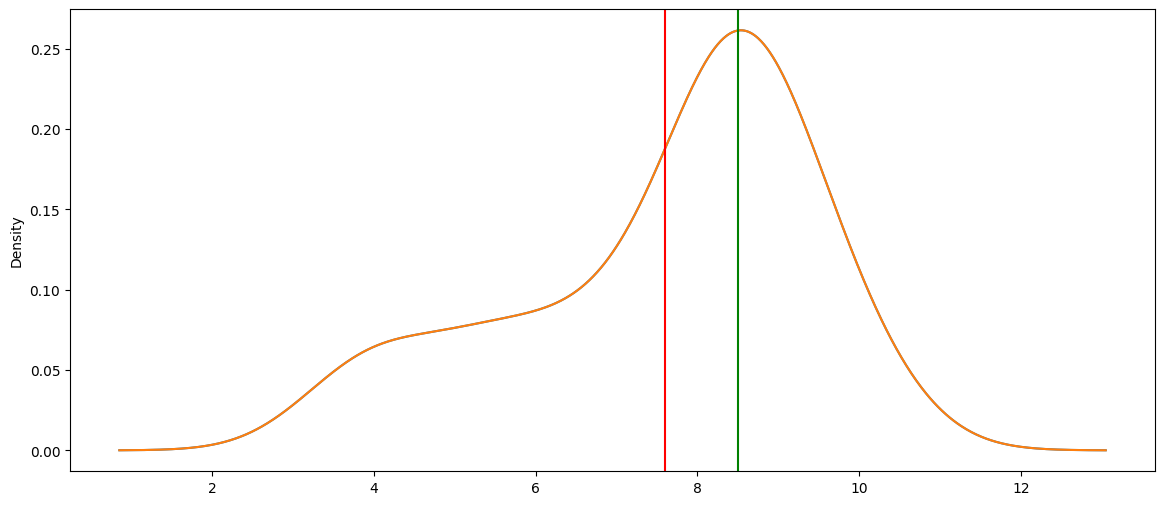

In [69]:
reais['NR FH'].plot(kind='density', figsize=(14,6))
ax = reais['NR FH'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(reais['NR FH'].mean(), color='red')
ax.axvline(reais['NR FH'].median(), color='green')

Text(0.5, 0, 'Notas')

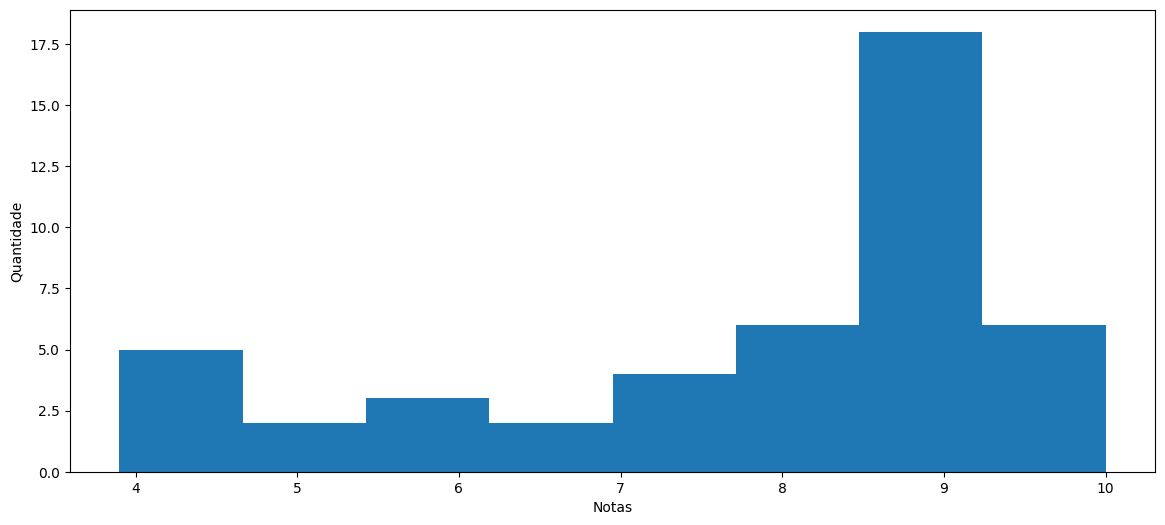

In [73]:
ax = reais['NR FH'].plot(kind='hist', figsize=(14,6), bins = 8)
ax.set_ylabel('Quantidade')
ax.set_xlabel('Notas')

<Axes: ylabel='Frequency'>

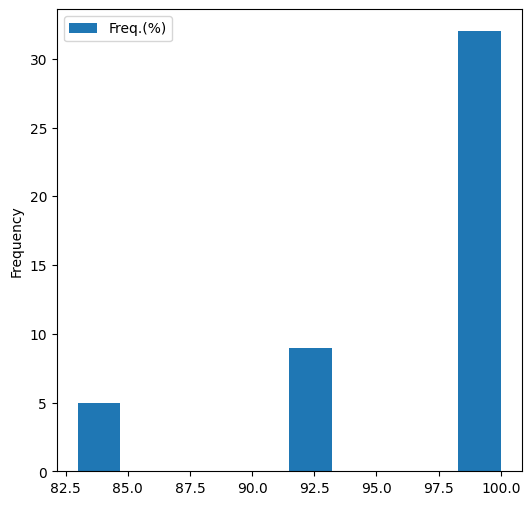

In [77]:
reais.plot(kind='hist', x='Nota', y='Freq.(%)', figsize=(6,6))

np.float64(0.2537060231211206)

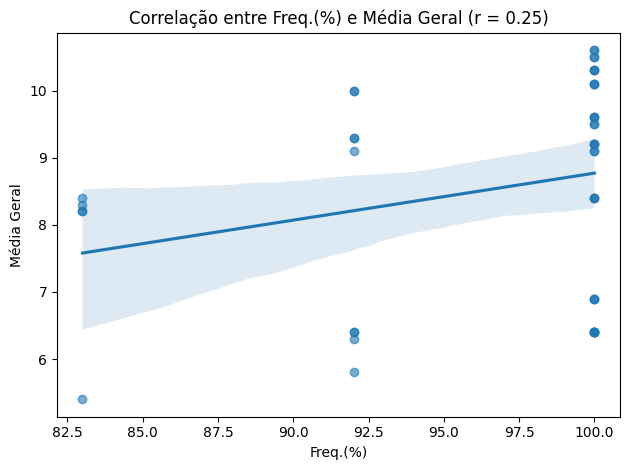

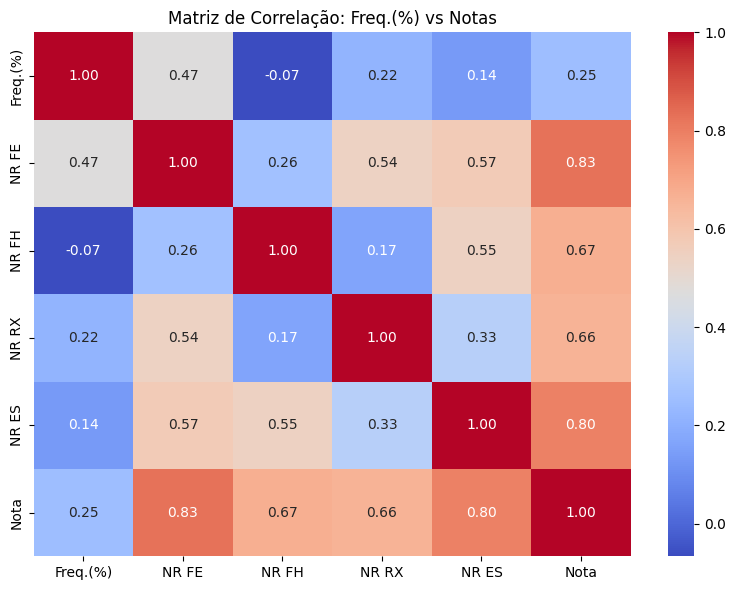

In [80]:
# Calcular correlação entre Faltas e Média Geral
correlacao_presença_media = reais[['Freq.(%)', 'Nota']].corr().iloc[0, 1]

# Plotar gráfico de dispersão com linha de regressão
plt.figure()
sns.regplot(data=reais, x='Freq.(%)', y='Nota', scatter_kws={'alpha':0.6})
plt.title(f'Correlação entre Freq.(%) e Média Geral (r = {correlacao_presença_media:.2f})')
plt.xlabel('Freq.(%)')
plt.ylabel('Média Geral')
plt.tight_layout()

# Matriz de correlação apenas entre Faltas e todas as outras variáveis numéricas
corr_matrix = reais[['Freq.(%)', 'NR FE', 'NR FH', 'NR RX', 'NR ES', 'Nota']].corr()

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação: Freq.(%) vs Notas")
plt.tight_layout()


correlacao_presença_media
